In [1]:
import re  # For preprocessing
import pandas as pd  # For data handling
import numpy as np
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
#split into sentences
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /home/steve/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/steve/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import gensim
from gensim import corpora
from gensim.models import LdaModel, LdaMulticore,  CoherenceModel
from gensim import models
import gensim.downloader as api
from gensim.utils import simple_preprocess, lemmatize
from gensim.corpora.dictionary import Dictionary
import spacy

import itertools

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim # don't skip this
import matplotlib.pyplot as plt

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
stop_words = stopwords.words('english')

!pip install spacy && python -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    texts_out = [word for word in texts_out if len(word)>0]
    return [word for word in texts_out if len(word[0])>2]

/home/steve/Desktop/Unit6_NLP_TopicWordclouds/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/home/steve/Desktop/Unit6_NLP_TopicWordclouds/venv/lib/python3.7/site-packages/en_core_web_sm
-->
/home/steve/Desktop/Unit6_NLP_TopicWordclouds/venv/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [4]:
def topic_clouds(sample_text=["Test"],n_words=5,n_topics=3,topics=[str(n) for n in range(10)]):

    sample_text_format = re.sub("[^A-Za-z.?!’]+", ' ', str(sample_text)).lower()
    sentences = nltk.sent_tokenize(sample_text_format)

    text = remove_stopwords(sent_to_words(sentences))
    texts = list(itertools.chain.from_iterable(text))

    texts = remove_stopwords(texts)

    texts_lemmatized = lemmatization(texts, allowed_postags=['NOUN'])#,'ADJ','VERB','ADV'])

    # Create dictionary; expects array as input
    dct = corpora.Dictionary(texts_lemmatized)
    dct.filter_extremes(no_below=10, no_above=0.2)

    mycorpus = [dct.doc2bow(doc, allow_update=True) for doc in texts_lemmatized]

    lda_model = LdaMulticore(corpus=mycorpus,id2word=dct,random_state=100,num_topics=n_topics,
                          passes=10,chunksize=1000,batch=False,alpha='asymmetric',
                          decay=0.5,offset=64,eta=None,eval_every=0,iterations=15,
                          gamma_threshold=0.001,per_word_topics=True)
    lda_model.save('lda_model.model')

    # Plot Topics
    # pyLDAvis.enable_notebook()
    # vis = pyLDAvis.gensim.prepare(lda_model, mycorpus, dct)
    # vis

    for t in range(lda_model.num_topics):
        plt.figure()
        plt.imshow(WordCloud(width=350, height=400).fit_words(dict(lda_model.show_topic(t, n_words))))
        plt.axis("off")
        #plt.title("Topic: " + topics[t])
        plt.show()

/home/steve/Desktop/Unit6_NLP_TopicWordclouds/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Example Podcast

In [5]:
biden = open("Data/Biden_Podcast.txt", "r").read()

/home/steve/Desktop/Unit6_NLP_TopicWordclouds/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


We first remove all non-alphanumeric characters, except for end-of-sentence punctuation.

In [6]:
sample_text = biden
sample_text_format = re.sub("[^A-Za-z.?!’]+", ' ', str(sample_text)).lower()
sample_text_format

/home/steve/Desktop/Unit6_NLP_TopicWordclouds/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'michelle goldberg i’m michelle goldberg. michelle cottle i’m michelle cottle. jamelle bouie i’m jamelle bouie. frank bruni and i’m frank bruni and this is the argument. the democratic convention is finally here if you can even call it a convention. like all else about a presidential campaign conducted in the shadow of a pandemic it’s nothing like what happened in years past. does that negate its usefulness? what can and should democrats accomplish through this socially distanced virtual extravaganza? to answer these questions we’re doing something a little different today. four of us are hosting the show but none of the four is ross who’s on vacation. and we’re gathering on tuesday morning after the first night of the convention. so we’re in the middle of a news event which means plenty is going to happen after this recording. but whatever transpires there are questions that will endure between now and election day and the morning after. they’re questions about the biden harris ticket

Next we split the text into separate sentences/tokens.

In [7]:
sentences = nltk.sent_tokenize(sample_text_format)
sentences[:5]

/home/steve/Desktop/Unit6_NLP_TopicWordclouds/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['michelle goldberg i’m michelle goldberg.',
 'michelle cottle i’m michelle cottle.',
 'jamelle bouie i’m jamelle bouie.',
 'frank bruni and i’m frank bruni and this is the argument.',
 'the democratic convention is finally here if you can even call it a convention.']

Remove stopwords and split into words.

In [8]:
text = sent_to_words(sentences)
texts = list(itertools.chain.from_iterable(text))
texts = remove_stopwords(texts)
texts[30:40]

/home/steve/Desktop/Unit6_NLP_TopicWordclouds/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[],
 ['even'],
 ['call'],
 [],
 ['convention'],
 ['like'],
 [],
 ['else'],
 [],
 ['presidential']]

Lemmatize each word (Reducing each word to it's stem) and only keeping Nouns.

In [9]:
texts_lemmatized = lemmatization(texts, allowed_postags=['NOUN'])
texts_lemmatized[:10]

/home/steve/Desktop/Unit6_NLP_TopicWordclouds/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['argument'],
 ['convention'],
 ['convention'],
 ['campaign'],
 ['year'],
 ['question'],
 ['today'],
 ['none'],
 ['vacation'],
 ['morning']]

Create dictionary and build LDA Model.

In [10]:
# Create dictionary; expects array as input
dct = corpora.Dictionary(texts_lemmatized)
dct.filter_extremes(no_below=10, no_above=0.2)

mycorpus = [dct.doc2bow(doc, allow_update=True) for doc in texts_lemmatized]

lda_model = LdaMulticore(corpus=mycorpus,id2word=dct,random_state=100,num_topics=3,
                        passes=10,chunksize=1000,batch=False,alpha='asymmetric',
                        decay=0.5,offset=64,eta=None,eval_every=0,iterations=15,
                        gamma_threshold=0.001,per_word_topics=True)
lda_model.save('lda_model.model')

/home/steve/Desktop/Unit6_NLP_TopicWordclouds/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Plot Wordclouds and add custom topics after.

/home/steve/Desktop/Unit6_NLP_TopicWordclouds/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


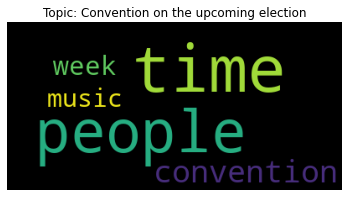

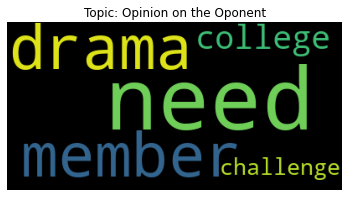

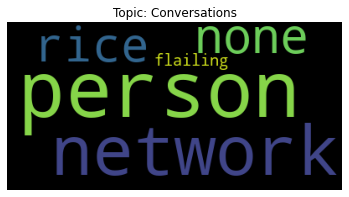

In [11]:
topics = ['Convention on the upcoming election','Opinion on the Oponent','Conversations']

for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(t, 5))))
    plt.axis("off")
    plt.title("Topic: " + topics[t])
    plt.show()

# Wordclouds

/home/steve/Desktop/Unit6_NLP_TopicWordclouds/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


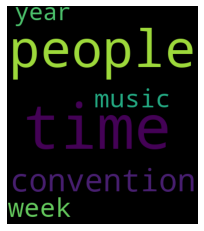

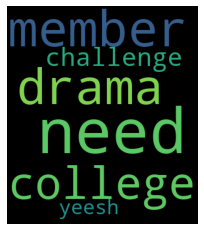

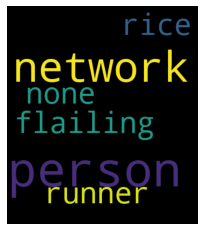

In [12]:
biden = open("Data/Biden_Podcast.txt", "r").read()
topics = ['Convention on the upcoming election','Opinion on the Oponent','Conversations']
topic_clouds(biden,topics=topics,n_words=6)

/home/steve/Desktop/Unit6_NLP_TopicWordclouds/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


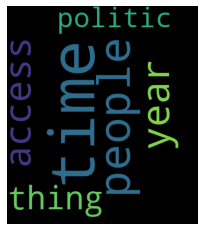

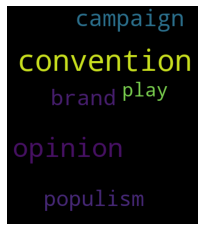

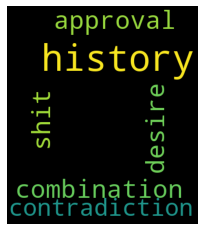

In [13]:
trump = open("Data/Trump_Podcast.txt", "r").read()
topic_clouds(trump, n_words=6)

/home/steve/Desktop/Unit6_NLP_TopicWordclouds/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


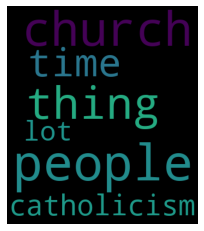

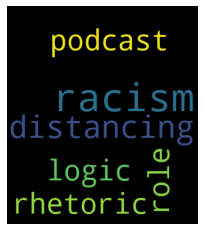

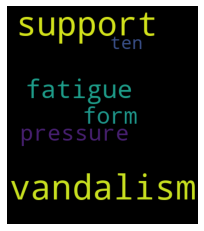

In [14]:
indi = open("Data/Individ.txt", "r").read()
topic_clouds(indi,n_words=6)

/home/steve/Desktop/Unit6_NLP_TopicWordclouds/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


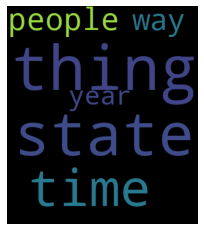

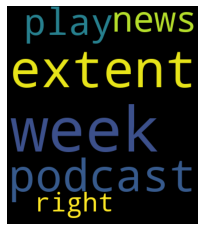

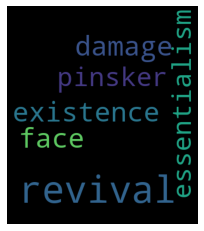

In [15]:
state = open("Data/State.txt", "r").read()
topic_clouds(state,n_words=6)